In [13]:
import pandas as pd
# PREPARE SIMMOBILITY
# simFolder = 'Auto_sprawl_drive_main/simmobility/'
# gtfsFolder = 'clean-gtfs/MergedBus/'
# processFolder = 'process_big/'
# databaseFolder = 'to_db_big/'

# Small example
simFolder = 'Baltimore_small/simmobility/'
gtfsFolder = 'gtfs_source_small_example/gtfs-QueenAnne/'
processFolder = 'process_small_example/'
databaseFolder = 'to_db/'

def getSubtripMetrics():
    connectedTrips = pd.read_pickle(processFolder + 'subtrips_wSegments.pkl')
    connectedTrips['len_stops'] = connectedTrips.apply(lambda row: len(row.stops), axis=1)
    connectedTrips['len_uniq_stops'] = connectedTrips.apply(lambda row: len(set(row.stops)), axis=1)
    print('Number of the same segment consequent stops')
    print(len(connectedTrips[connectedTrips.len_stops != connectedTrips.len_uniq_stops]))
    connectedTrips['len_path_in_seg'] = connectedTrips.apply(lambda row: len(row.path_segments), axis=1)
    print("stops ---------------")
    print(connectedTrips.len_stops.value_counts())
    # print("paths ----------------")
    print(connectedTrips.len_stops.sum())
    # print(connectedTrips.len_path_in_seg.value_counts())


('Number of routes ', 724)
('Len of route stops median ', 3.0)
('Number of stops ', 1123)
('Number of stops (coordinatewise) ', 1109)


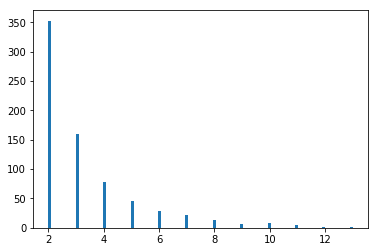

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Baltimore
simFolder = 'Auto_sprawl_drive_main/simmobility/'
gtfsFolder = 'clean-gtfs/MergedBus/'
processFolder = 'process_big/'
databaseFolder = 'to_db_big/'

# Tel Aviv
simFolder = '../../network-from-OSM/Outputs/tel_aviv/simmobility_wgs84/'
gtfsFolder = 'gtfs_clean_israel/bus/'
processFolder = 'process_tel_aviv/'
databaseFolder = 'to_db_tel_aviv/'


def getRouteMetrics():
    # ['route_id', 'sequence_no', 'section_id']
    pt_bus_routes = pd.read_csv(databaseFolder +  'pt_bus_routes.csv')

    print('Number of routes ', len(pt_bus_routes.route_id.unique()))
    route_segments = pt_bus_routes.groupby('route_id')['section_id'].apply(list)
    route_segments_len = route_segments.apply(lambda row: len(row))
    print('Len of route segments median ', route_segments_len.median())
    plt.hist(route_segments_len, bins=100)
    
    
def getRouteStopMetrics():
    # ['route_id', 'stop_code', 'sequence_no']
    pt_bus_stops = pd.read_csv(databaseFolder +  'pt_bus_stops.csv')
    print('Number of routes ', len(pt_bus_stops.route_id.unique()))
    route_stops = pt_bus_stops.groupby('route_id')['stop_code'].apply(list)
    route_stops_len = route_stops.apply(lambda row: len(row))
    print('Len of route stops median ', route_stops_len.median())
    plt.hist(route_stops_len, bins=100)
getRouteStopMetrics()

def getStopMetrics():
    # ['x', 'y', 'z', 'id', 'code', 'section_id', 'name', 'status', 'terminal',
    #    'length', 'section_offset', 'tags', 'reverse_section', 'terminal_node']
    bus_stops = pd.read_csv(databaseFolder + 'bus_stop.csv')
    print('Number of stops ', len(bus_stops.id.unique()))
    uni_stops = bus_stops.drop_duplicates(subset=['x', 'y'])
    print('Number of stops (coordinatewise) ', len(uni_stops))
getStopMetrics()
    

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# simFolder = 'Baltimore_small/simmobility/'
# gtfsFolder = 'gtfs_source_small_example/gtfs-QueenAnne/'
# processFolder = 'process_small_example/'
# databaseFolder = 'to_db/'

# simFolder = 'Auto_sprawl_drive_main/simmobility/'
# gtfsFolder = 'clean-gtfs/MergedBus/'
# processFolder = 'process_big/'
# databaseFolder = 'to_db_big/'

simFolder = '../../network-from-OSM/Outputs/tel_aviv/simmobility_wgs84/'
gtfsFolder = 'gtfs_clean_israel/bus/'
processFolder = 'process_tel_aviv/'
databaseFolder = 'to_db_tel_aviv/'

def getRouteMetrics_original():
    # ['route_id', 'sequence_no', 'section_id']
#     print('Number of routes ', len(pt_bus_routes.route_id.unique()))
#     route_segments = pt_bus_routes.groupby('route_id')['section_id'].apply(list)
#     route_segments_len = route_segments.apply(lambda row: len(row))
#     print('Len of route segments median ', route_segments_len.median())
#     plt.hist(route_segments_len, bins=100)
    trips_df = pd.read_csv(gtfsFolder  + 'trips.txt')
    shape_df = pd.read_csv(gtfsFolder + 'shapes.txt')
    print(trips_df.columns)
    print(shape_df.columns)

# getRouteMetrics_original()
    
    
def getRouteStopMetrics_original():
    stoptime_df = pd.read_csv(gtfsFolder  + 'stop_times.txt')
    trip_stop = stoptime_df.groupby('trip_id')['stop_id'].apply(list)
    trip_stop_len = trip_stop.apply(lambda row: len(row))
    print('Len of route stops median ', trip_stop_len.median())
    plt.hist(trip_stop_len, bins=100)
# getRouteStopMetrics()

def getStopMetrics_original():
    stop_df = pd.read_csv(gtfsFolder + 'stops.txt')
    # ['x', 'y', 'z', 'id', 'code', 'section_id', 'name', 'status', 'terminal',
    #    'length', 'section_offset', 'tags', 'reverse_section', 'terminal_node']
    print('Number of stops ', len(stop_df.stop_id.unique()))
    uni_stops = stop_df.drop_duplicates(subset=['stop_lon', 'stop_lat'])
    print('Number of stops (coordinatewise) ', len(uni_stops))
getStopMetrics_original()

('Number of stops ', 8962)
('Number of stops (coordinatewise) ', 8837)
